## Naive Bayes


In [1]:
import itertools
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('titanic.csv')
df = df.drop(['Name', 'Sex'], axis=1)

df.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,3,22.0,1.0,0,7.2500,0
1,1,38.0,1.0,0,71.2833,1
2,3,NaN,0.0,0,7.9250,1
3,1,NaN,1.0,0,53.1000,1
4,3,NaN,0.0,0,8.0500,0


#### Drop Null

In [3]:
df = df.dropna()

In [4]:
df.isna().sum()

Pclass                     0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Survived                   0
dtype: int64

#### Feature Engineering

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(880, 5)
(880,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print()
print()
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (704, 5)
Shape of y_train:  (704,)


Shape of X_test:  (176, 5)
Shape of y_test:  (176,)


In [8]:
# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Training the Naive Bayes model on the Training set

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


print('Accuracy Score: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
print('')
print('Precision Score: {:.2f}%'.format(metrics.precision_score(y_test, y_pred) * 100))  
print('')
print('Recall Score: {:.2f}%'.format(metrics.recall_score(y_test, y_pred) * 100))
print('')
print('F1 Score: {:.2f}%'.format(metrics.f1_score(y_test, y_pred) * 100))

Accuracy Score: 70.45%

Precision Score: 62.79%

Recall Score: 42.86%

F1 Score: 50.94%


In [11]:
target_names = ['survived', 'died']

In [12]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[97 16]
 [36 27]]


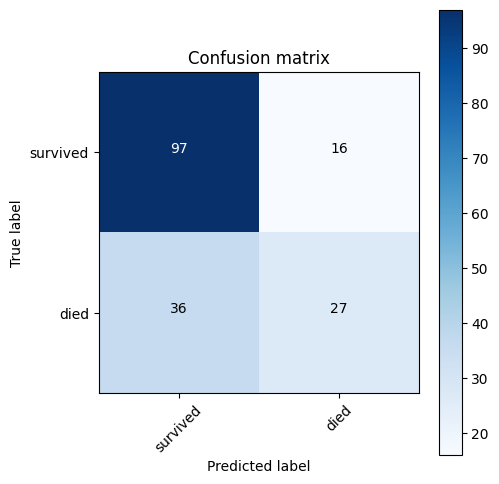

In [14]:
plt.figure(figsize=(5, 5))

plot_confusion_matrix(cm, target_names)